In [91]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start = start_date, end = end_date, freq = freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data.set_index('ds', inplace = True)

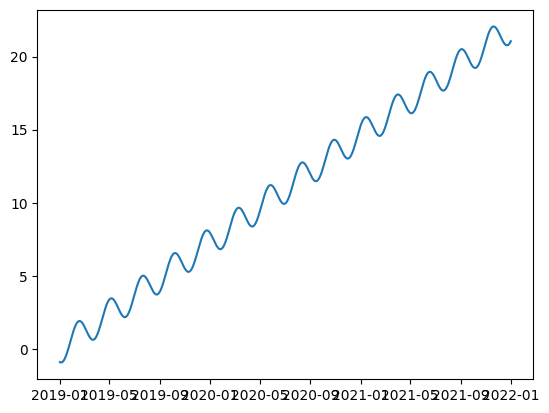

In [32]:
plt.plot(data)

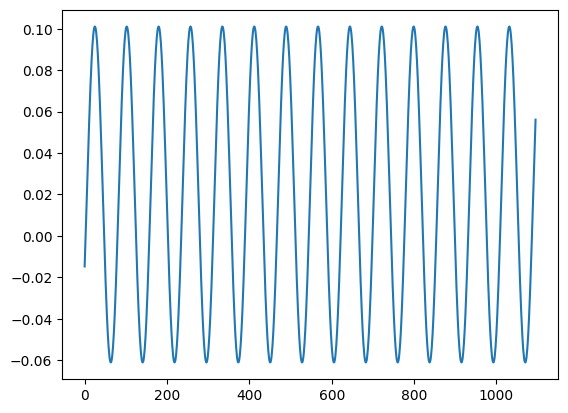

In [81]:
plt.plot(prices_diff)

In [78]:
prices_diff = np.diff(prices)

In [33]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [80]:
adf_test(prices_diff)

1. ADF :  -3369737147500.961
2. P-Value :  0.0
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1094
5. Critical Values :
	 1% :  -3.436341508283391
	 5% :  -2.864185524365606
	 10% :  -2.5681785627437677


In [82]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(prices_diff, 
                          suppress_warnings = True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:               SARIMAX(3, 0, 2)   Log Likelihood               10150.685
Date:                Sun, 15 Oct 2023   AIC                         -20287.371
Time:                        01:17:29   BIC                         -20252.375
Sample:                             0   HQIC                        -20274.129
                               - 1096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002    2.9e-07    734.048      0.000       0.000       0.000
ar.L1          1.3171   4.78e-06   2.75e+05      0.000       1.317       1.317
ar.L2          0.3482   2.14e-06   1.63e+05      0.000       0.348       0.348
ar.L3         -0.6762   1.23e-06  -5.51e+05      0.000      -0.676      -0.676
ma.L1         -0.2107   7.52e-10   -2.8e+08      0.000      -0.211      -0.211
ma.L2         -0.2710    7.5e-10  -3.61e+08      0.000      -0.271      -0.271
sigma2      3.131e-10   9.83e-11      3.184      0.001     1.2e-10    5.06e-10
===================================================================================
Ljung-Box (L1) (Q):                 549.46   Jarque-Bera (JB):             39724.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+24. Standard errors may be unstable.
"""

In [83]:
data_len = len(prices_diff)

In [84]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [86]:
train_data = prices_diff[:int(train_len)]

In [87]:
test_data = prices_diff[int(train_len):int(train_len + test_len)]

In [88]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data, order=(3, 1, 2))
model = model.fit()
model.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  767
Model:               SARIMAX(3, 1, 2)   Log Likelihood                2610.288
Date:                Sun, 15 Oct 2023   AIC                          -5208.577
Time:                        01:18:23   BIC                          -5180.730
Sample:                             0   HQIC                         -5197.857
                                - 767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       8.512e-07      1.675   5.08e-07      1.000      -3.284       3.284
ar.L2       8.437e-07      2.839   2.97e-07      1.000      -5.564       5.564
ar.L3       8.314e-07      3.321    2.5e-07      1.000      -6.508       6.508
ma.L1       8.512e-07      1.675   5.08e-07      1.000      -3.284       3.284
ma.L2       8.436e-07      2.839   2.97e-07      1.000      -5.564       5.564
sigma2         0.0002   1.88e-05      8.025      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                 761.88   Jarque-Bera (JB):                71.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.02
Prob(H) (two-sided):                  0.66   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.34e+16. Standard errors may be unstable.
"""

Text(0, 0.5, 'Price')

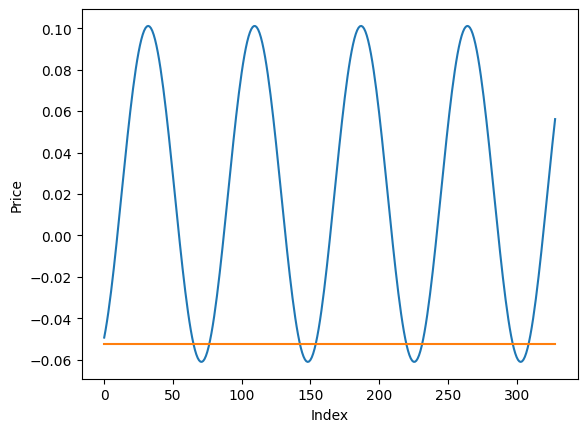

In [93]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels')
#pred.index=index_future_dates
plt.plot(test_data)
plt.plot(pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [94]:
pred

array([-0.05256422, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05256421,
       -0.05256421, -0.05256421, -0.05256421, -0.05256421, -0.05

In [50]:
pred = pred.iloc[1:]

In [51]:
pred

2021-02-07    14.856709
2021-02-08    14.757953
2021-02-09    14.715813
2021-02-10    14.678261
2021-02-11    14.645481
                ...    
2021-12-28    20.849151
2021-12-29    20.886782
2021-12-30    20.930819
2021-12-31    20.981105
2022-01-01    21.037440
Freq: D, Name: ARIMA predictions, Length: 329, dtype: float64

In [52]:
test_data = test_data.iloc[1:]

In [55]:
test_data

,y
ds,
2021-02-07,14.807325
2021-02-08,14.761581
2021-02-09,14.719908
2021-02-10,14.682712
2021-02-11,14.650369
...,...
2021-12-28,20.855722
2021-12-29,20.893281
2021-12-30,20.937204


Text(0, 0.5, 'Price')

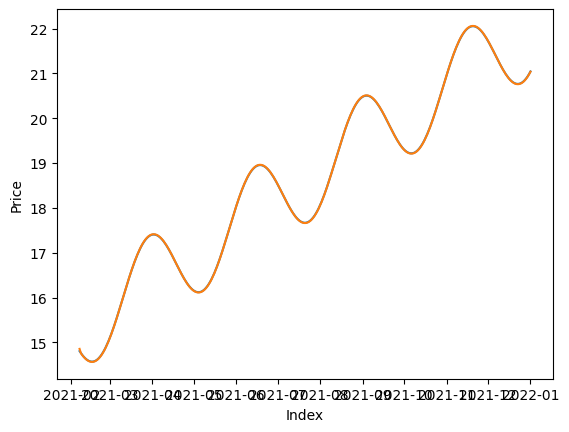

In [71]:
plt.plot(test_data)
plt.plot(pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [66]:
error = list()
for i in range(len(test_data)):
    error.append(test_data.loc[test_data.index[i]].y - pred[i])

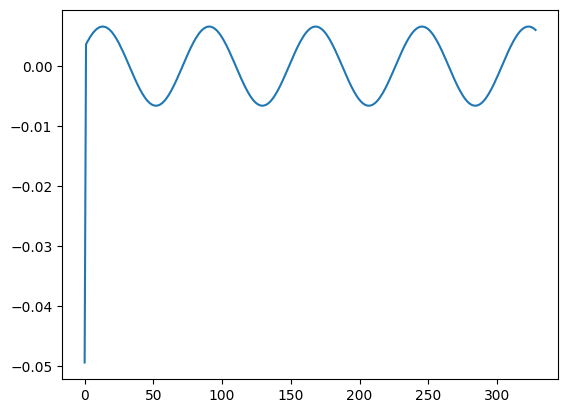

In [68]:
plt.plot(error)

In [69]:
pred

2021-02-07    14.856709
2021-02-08    14.757953
2021-02-09    14.715813
2021-02-10    14.678261
2021-02-11    14.645481
                ...    
2021-12-28    20.849151
2021-12-29    20.886782
2021-12-30    20.930819
2021-12-31    20.981105
2022-01-01    21.037440
Freq: D, Name: ARIMA predictions, Length: 329, dtype: float64

In [70]:
test_data

,y
ds,
2021-02-07,14.807325
2021-02-08,14.761581
2021-02-09,14.719908
2021-02-10,14.682712
2021-02-11,14.650369
...,...
2021-12-28,20.855722
2021-12-29,20.893281
2021-12-30,20.937204
